# Biodiversity in U.S. National Parks

## Introduction

In this report, we will examine biodiversity within U.S. national parks by analyzing species records, their biological classifications,

and observation data. 

This will provide a better picture of the parks’ ecosystems and support a better understanding of at‑risk and endangered species.

This analysis is based on a dataset provided by Codecademy, inspired by records from the U.S. National Parks Service. 

It contains species observations across multiple national parks, including biological classifications, conservation statuses, and observation counts.

## Table of Contents

1. [Introduction](#introduction)  
2. [Scope](#scope)  
3. [Data Exploration](#data-exploartion)
4. [Analysis](#analysis)
5. [Conclusions](#conclusions)

## Scope

The scope of this report centers on identifying patterns in species vulnerability and distribution, with a particular focus on conservation status.

The analysis aims to uncover ecological trends and highlight potential biases or gaps in the data—especially those related to missing or ambiguous classifications.

The analysis will be based on the following questions: 

- How does the distribution of conservation statuses vary across biological categories once unknown statuses are excluded?
- Which biological categories contain the highest number of at-risk species when considering all known non-positive conservation statuses?
- Which national parks have the greatest concentration of at-risk species relative to the total species recorded there?
- How are at-risk species are distributed across parks?

By answering these questions, the report will help build a clearer view of biodiversity in the parks

and show how much we can rely on the conservation data as source for future work. 


## Python Libraries

In [149]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

### Loading The Data

The **observations file** has the following columns:  
* `scientifc_name` - The scientific name of the animal/plant
* `park_name` - The name of the U.S. nationalpark 
* `observations` - The number of observations of the creature/plant in a specific park

In [150]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



**species_info** is a **file** with data about each creature:

 * `category` - The biological category that the animal/plant belongs to - (Bird/Mammal/Plant/etc)
 * `scientific name` - The scientific name of the animal
 * `common names` - A list of common names for the species 
 * `conservation_status` - The status of conservation - can be Endangered, Threatend, in_recovry,   


In [151]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


By examining the `species_info` file, we identified several duplicate scientific names. For example, *Canis lupus* appears three times with different conservation statuses, and *Vireo solitarius* appears twice, one instance having two common names.  

The `Conservation Status` field contains NaN values for species that are not endangered. To ensure consistency, these were replaced with the label **"Unknown"**. However, this substitution should be interpreted cautiously, as it may mask true conservation statuses and reflects possible biases in how species are monitored.

Using `dtypes`, `info`, and `describe`, we confirmed that all variables—except `observations` (an integer)—are stored as objects, consistent with their categorical nature.

---

## Cleaning and Formatting the Data

**`observations`**  
A review revealed identical records (same scientific name, same park, same observation count). With no timestamps or distinguishing fields to differentiate them, these entries were treated as duplicates and removed. No missing values were present.

**`species_info`**  
This dataset contained multiple rows sharing the same category and scientific name but differing in common name(s) or conservation status. Since common names are not part of our analysis, we ignored this field and retained only the last occurrence in the CSV—assuming it to be the most recent entry, though no timestamps were available to confirm.  

The `conservation_status` column had 5,633 missing entries. These were filled with `Unknown`to standardize the data. While this allows for consistent processing, the absence of conservation data is unlikely to be random and may reflect disparities in research attention and resource allocation.

For analyses based on observation counts, a new column was added to the observations dataframe containing the total observation sum for each scientific name.

In [160]:
## Check for missing values
observations.isnull().sum()
species.isnull().sum()
print(species['scientific_name'].dtypes)

#check for duplicates in the 'observations' DataFrame
print(observations.duplicated(keep=False).sum())

# drop the duplicated rows
observations.drop_duplicates(inplace=True)

# fill NaN values in the 'conservation_status' column with 'Unknown'
species['conservation_status'] = species['conservation_status'].fillna('Unknown') 

# Clean park names by removing 'National Park' suffix
observations['park_name'] = observations['park_name'].str.replace(' National Park', '', regex=True)

# check for duplicates in the 'species_info' DataFrame - where category and scientific_name are the same
dup_mask = species[species.duplicated(subset=["category", "scientific_name"], keep=False)].sort_values(by=["scientific_name"])
species = species.drop_duplicates(subset=["category", "scientific_name"], keep='last')

# Count the number of observations for each species and add it to the species DataFrame 
obs_counts = observations.groupby('scientific_name')['observations'].sum()
species['observations'] = species['scientific_name'].map(obs_counts)

object
0


## Data Exploration

- The **observations** dataset contains **23,281 rows**, covering **5,541 unique species** observed across **4 parks**.  
- The most frequently observed species is `Holcus lanatus(velvet grass)`, with **1,780 observations** across all parks.  
- The least observed species is `Grus americana(Whooping Crane)`, recorded only **131 times**.  
- Observations are evenly distributed across the 4 parks, with each contributing roughly **25%** of the total dataset.  
- Observation counts per species are also uniform, averaging about **0.01%** of the total dataset for each species.  

In [ ]:
parks = observations["park_name"].unique()
# general statistics for observations df
print(f"Total observations {observations.shape[0]}")
print(f"Most observed Species: {observations.groupby('scientific_name')['observations'].sum().idxmax()} with {observations.groupby('scientific_name')['observations'].sum().max()} observations in total")
print(f"Least observerd Species: {observations.groupby('scientific_name')['observations'].sum().idxmin()} with {observations.groupby('scientific_name')['observations'].sum().min()} observations in total")
print(f"Total number of unique species: {observations.scientific_name.nunique()}")
print(f"Total number of parks: {observations.park_name.nunique()}")
print(f"park observations distribution:\n{observations.park_name.value_counts(normalize=True)*100}")
print(f"species distribution:\n{observations.scientific_name.value_counts(normalize=True).sort_index()*100}")

Total observations 23281
Most observed Species: Holcus lanatus with 1780 observations in total
Least observerd Species: Grus americana with 131 observations in total
Total number of unique species: 5541
Total number of parks: 4
park observations distribution:
park_name
Bryce                    25.011812
Yosemite                 25.003222
Yellowstone              24.994631
Great Smoky Mountains    24.990335
Name: proportion, dtype: float64
species distribution:
scientific_name
Abies bifolia                          0.017181
Abies concolor                         0.017181
Abies fraseri                          0.017181
Abietinella abietina                   0.017181
Abronia ammophila                      0.017181
                                         ...   
Zonotrichia leucophrys gambelii        0.017181
Zonotrichia leucophrys oriantha        0.017181
Zonotrichia querula                    0.017181
Zygodon viridissimus                   0.017181
Zygodon viridissimus var. rupestris    

## Species Dataset Overview

The dataset contains **5,541** distinct species spanning **seven biological categories** and **five conservation status categories**.  

*Vascular plants* dominate the records, representing **76.9%** of all entries. In contrast, categories such as *fish*, *amphibians*, and *reptiles* each account for just **1–2%**. This imbalance suggests a strong sampling bias—potentially due to geographic conditions favoring plant-rich environments, researcher emphasis on flora, or the relative ease of cataloging stationary species compared to mobile or elusive fauna.  

A significant **96.7%** of conservation status values are missing. This absence is unlikely to be *Missing At Random (MAR)* and is more plausibly *Not Missing At Random (NMAR)*—meaning the lack of data may be systematically related to the actual status, for example, species that are rare or unassessed being less likely to have recorded information.

For analysis, rather than focusing solely on “endangered” species, we define **at‑risk species** as those labeled *Species of Concern*, *In recovery*, *Threatened*, or *Endangered*.  

In [ ]:
# general statistics for species df
print(f"number of Species {species.shape[0]}")
print(f"types of Species: {species.category.nunique()}")
print(f"types of Species: {species.conservation_status.unique()}")
print(species.category.value_counts(normalize=True)*100)
print(species.conservation_status.value_counts(normalize=True)*100)

number of Species 5541
types of Species: 7
types of Species: ['Unknown' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
category
Vascular Plant       76.917524
Bird                  8.807075
Nonvascular Plant     6.009746
Mammal                3.176322
Fish                  2.255910
Amphibian             1.425735
Reptile               1.407688
Name: proportion, dtype: float64
conservation_status
Unknown               96.769536
Species of Concern     2.725140
Endangered             0.270709
Threatened             0.180473
In Recovery            0.054142
Name: proportion, dtype: float64


## Analysis

## Status Distribution Analysis

To understand how conservation statuses are distributed across biological categories, we first excluded entries labeled as **“Unknown”** or containing missing values. This allowed us to focus on the structure of known classifications.

After filtering, the breakdown reveals a pronounced imbalance:

- **Species of Concern** account for **84.4%** of all known cases, making it the dominant status by a wide margin.
- **Threatened** and **Endangered** species appear far less frequently.
- **In Recovery** is the least represented status in the dataset.

This distribution is heavily **left-skewed**, driven by the overwhelming presence of *Species of Concern* and the near absence of *In Recovery*. It suggests that many species are flagged as potentially vulnerable but have not yet been formally classified under stricter conservation categories.

To better understand the impact of missing data, we examined the distribution of **“Unknown”** statuses across biological categories. The results show that *vascular plants* have the highest number of unknown entries—closely mirroring their overall species count. This indicates that missing conservation statuses are **not missing at random (NMAR)**, but rather concentrated in specific groups, likely due to gaps in field assessment, taxonomic complexity, or resource limitations.

A supporting bar chart (included below) visualizes this skew, highlighting how **vascular plants dominate the unknown category**, reinforcing concerns about classification bias and underreporting.

These findings confirm the **classification and sampling biases** first suspected during the data exploration phase. The prevalence of unknown statuses—especially in high-diversity groups—raises serious questions about the completeness and reliability of conservation data, and underscores the need for improved species assessment protocols.

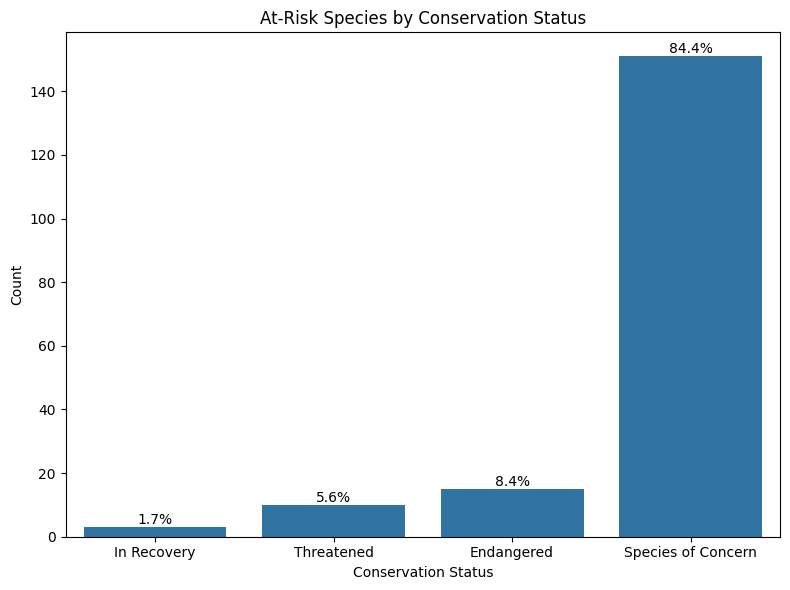

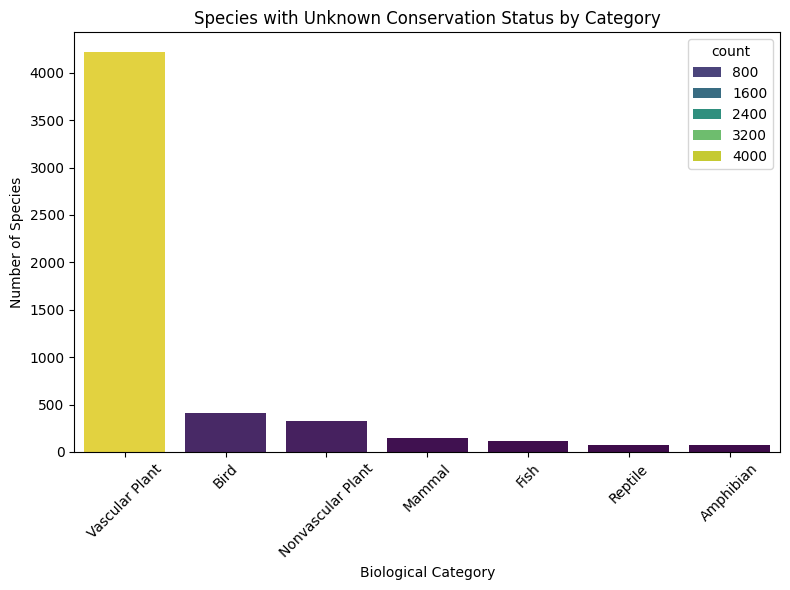

In [155]:
at_risk_species_df = species[
    ~species['conservation_status'].isin(['Unknown'])
][['scientific_name', 'category', 'conservation_status', 'observations']]

at_risk_summary = (
    at_risk_species_df
    .groupby('conservation_status')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=True)
)

at_risk_summary['pct'] = at_risk_summary['count'] / at_risk_summary['count'].sum() * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=at_risk_summary,
    x='conservation_status',
    y='count',
    order=at_risk_summary['conservation_status']
)

for bar, pct in zip(ax.containers[0], at_risk_summary['pct']):
    colors = {
        'Species of Concern': '#1f77b4',}
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("At-Risk Species by Conservation Status")
plt.ylabel("Count")
plt.xlabel("Conservation Status")
plt.tight_layout()
plt.show()


not_at_risk_species_df = species[
    species['conservation_status'].isin(['Unknown'])
][['scientific_name', 'category', 'conservation_status', 'observations']]

unknown_status_data = not_at_risk_species_df.groupby(['category', 'conservation_status']).size().reset_index(name='count')

# Sort categories by total count in descending order
order = unknown_status_data.sort_values('count', ascending=False)['category']

plt.figure(figsize=(8, 6))
sns.barplot(data=unknown_status_data, x='category', y='count', hue='count', palette='viridis',order=order)
plt.xticks(rotation=45)
plt.title('Species with Unknown Conservation Status by Category')
plt.ylabel('Number of Species')
plt.xlabel('Biological Category')
plt.tight_layout()
plt.show()


## At‑Risk vs. Biological Categories Analysis

Birds represent the **highest number of at‑risk species**, with **72** individuals — clearly more than any other biological category.

This dominance suggests that avian species in the surveyed areas may be especially vulnerable, 

potentially due to habitat loss, migration pressures, or sensitivity to environmental change. 

**Vascular plants** (**46** species) and **mammals** (**30** species) follow at a moderate level, 

indicating that conservation priorities should not be limited to fauna alone — plant diversity appears under notable pressure as well.

All remaining categories show comparatively low totals, which could be stem from gaps in observation 

or reflect true lower vulnerability in those groups or reporting.

Consistent with earlier findings, **‘Species of Concern’** continues to dominate across nearly every category, 

highlighting that most at‑risk listings here are not yet classified as endangered or threatened,

but may be trending toward greater risk without intervention.

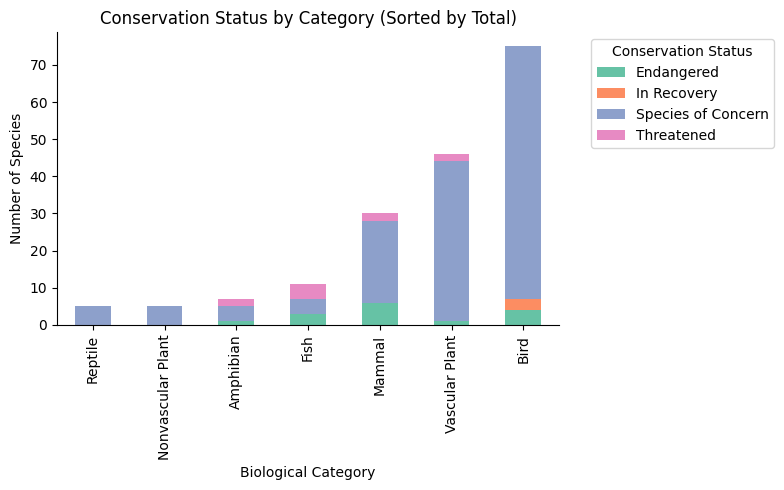

In [156]:
cat_status_counts = (
    at_risk_species_df
    .groupby(['category', 'conservation_status'])
    .size()
    .reset_index(name='count')
)

# Order categories by total count
order = (
    cat_status_counts.groupby('category')['count']
    .sum()
    .sort_values(ascending=True)
    .index
)

# Pivot to wide format in sorted category order
pivot_df = cat_status_counts.pivot(
    index='category',
    columns='conservation_status',
    values='count'
).fillna(0).loc[order]

# Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2", n_colors=len(pivot_df.columns)),
    figsize=(8, 5)
)

plt.ylabel('Number of Species')
plt.xlabel('Biological Category')
plt.title('Conservation Status by Category (Sorted by Total)')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

## At‑Risk Species by Park Analysis

Different national parks provide unique habitats that shape the variety of plants and animals found within them.

By comparing the data, we can identify which parks support a greater proportion of endangered species relative to all recorded observations.

The results show that **Yellowstone National Park** accounts for the largest share of endangered species observations at **43%**, 

followed by **Yosemite** at **26%**, **Bryce** at **18%**, and **Great Smoky Mountains** at **12%**.

Because each park’s observation count is the same, these percentages directly represent the share of at‑risk species in relation to all observations,

highlighting Yellowstone’s notably greater concentration of at‑risk wildlife.

at_risk_species_by_park:
               park_name    sum  percentage
2            Yellowstone  39035   43.320238
3               Yosemite  23533   26.116438
0                  Bryce  16263   18.048342
1  Great Smoky Mountains  11277   12.514982



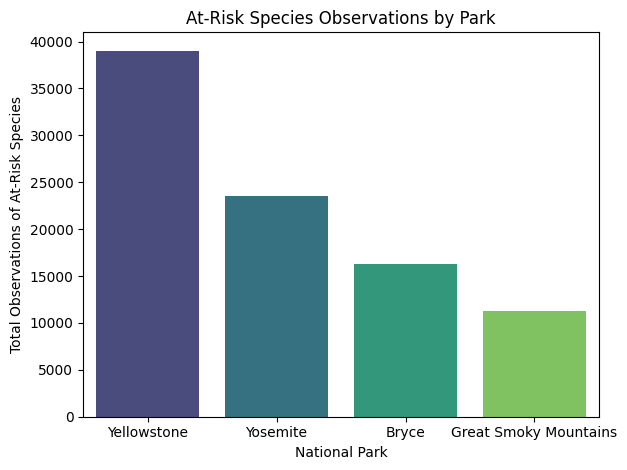

In [170]:
# Filter observations to *all at-risk* species
at_risk_species_by_park = observations[
    observations['scientific_name'].isin(at_risk_species_df['scientific_name'])
].groupby('park_name')['observations'].sum().reset_index(name='sum') \
 .sort_values(by='sum', ascending=False)


# Percentage of total observations that are at-risk
at_risk_species_by_park['percentage'] = (
    at_risk_species_by_park['sum'] * 100 / at_risk_species_by_park['sum'].sum()
)

print(f"at_risk_species_by_park:\n{at_risk_species_by_park}\n")

# Plot the total observations of at-risk species by park
sns.barplot(
    data=at_risk_species_by_park,
    x='park_name',
    y='sum',
    palette='viridis',
    hue='park_name'
)
plt.title('At-Risk Species Observations by Park')
plt.xlabel('National Park')
plt.ylabel('Total Observations of At-Risk Species')
plt.tight_layout()
plt.show()

## Most Frequently Observed At‑Risk Species by Park

Across four national parks, the top five most at-risk species are exclusively **birds** and **mammals**, with **bats** making up the majority of mammals.

`Myotis lucifugus(Little brown bat)` appears in all parks, while other bat species and the osprey show up in three out of four national parks. Only one park(yellowstone) lists a top five at risk non-bat mammal— a badger(`Taxidea taxus`). 

This pattern highlights bats as the most consistently vulnerable group, pointing to a widespread ecological stress.


C:\Users\Yoav\AppData\Local\Temp\ipykernel_18724\2626533384.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("viridis")(np.linspace(0, 1, len(d)))


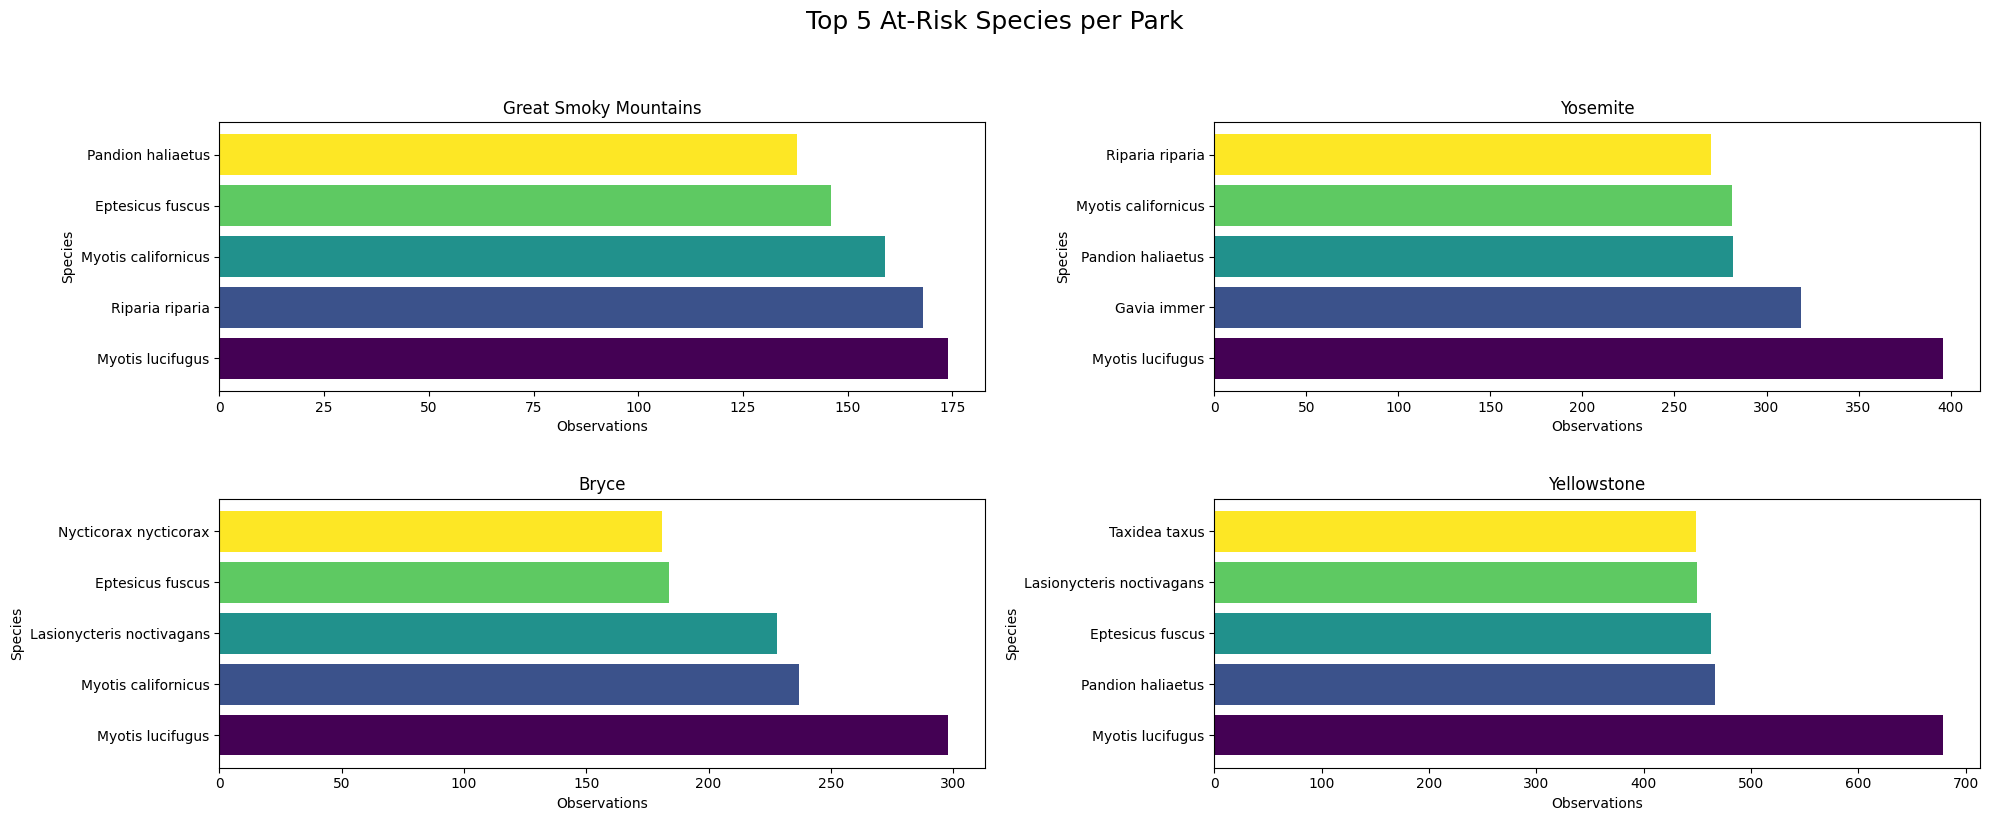

In [168]:
# Filter observations to at-risk species
at_risk_observations = observations[
    observations['scientific_name'].isin(at_risk_species_df['scientific_name'])
]
# Group by park and species, summing observations
by_park_data = (
    at_risk_observations
    .groupby(['park_name', 'scientific_name'])['observations']
    .sum()
    .reset_index()
    .sort_values(['park_name', 'observations'], ascending=[True, False])
    .groupby('park_name')
    .head(5)
)

plt.figure(figsize=(20, 8))
# plot top 5 at-risk species for each park
for i, park in enumerate(parks, start=1):
    plt.subplot(2, 2, i)
    d = by_park_data[by_park_data['park_name'] == park]
    colors = plt.cm.get_cmap("viridis")(np.linspace(0, 1, len(d)))
    plt.barh(d['scientific_name'], d['observations'], color=colors)
    plt.title(park)
    plt.xlabel("Observations")
    plt.ylabel("Species")

plt.suptitle("Top 5 At-Risk Species per Park", fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.88)
plt.show()



# Bat species analysis

Of the 16 bat species recorded, 8 have an `unknown` conservation status, 6 are listed as `species of concern`, 

1 is threatened, and 1 is endangered—indicating that at least half are at risk. 

When comparing total observations, `species of concern` account for over **4,100** sightings, while those with unknown status exceed **5,800**. 

This suggests that even frequently observed bats may still face significant threats, 

reinforcing the need for clearer conservation assessments and targeted protection efforts.

The chart below reveals a right-skewed distribution, with most bat species concentrated in the `Unknown` and
 `Species of Concern` categories, indicating that conservation uncertainty and ecological vulnerability 
are widespread despite varying observation counts.

Text(0.5, 1.0, 'Bat Species Observations by Conservation Status')

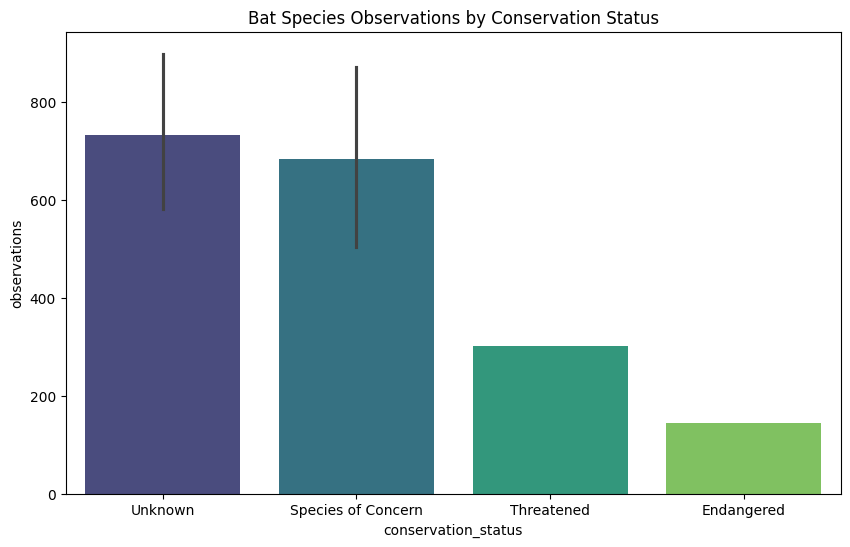

In [164]:
# filter species DataFrame for bats
bats = species[species['common_names'].str.contains('Bat', case=True, na=False)]

# Plotting bat species observations by conservation status
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bats,
    x='conservation_status',
    y='observations',
    order=bats['conservation_status'].value_counts().index,
    palette='viridis',
    hue='conservation_status',
)
plt.title('Bat Species Observations by Conservation Status')

## Conclusions

This analysis shows specific patterns in species vulnerabillity in U.S. national parks, but also deeply reflects the critical limitations stemming from the missing data in the conservation status column in the species info file.   

- The dominance of the `Species of Concern` classification among status logged suggests many species are marked for potential risk but lack formal designation. However, this insight is constrained by the **high proportion of missing or `Unknown` conservation statuses**, which significantly limits the reliability of any conclusions drawn from the data.

- These missing values are unlikely to be **Missing At Random (MAR)**. Taking a deeper dive into the data, examining **bat species**0especially, where half are labeled “Unknown” despite high observation counts—suggest the data may be **Not Missing At Random (NMAR)**. This implies that the likelihood of a conservation status being missing is related to the species’ actual risk level or the difficulty in assessing it, introducing potential bias into the analysis.

- The skewed distribution of known statuses, heavily weighted toward “Species of Concern,” may reflect a **classification limitation**-with species are informally recognized as vulnerable but not yet formally evaluated due to resource constraints, bureaucratic delays, or scientific uncertainty.

- **Yellowstone National Park** stands out with the highest proportion of endangered species observations, reinforcing its ecological significance. Yet without complete status data, even high-frequency sightings may fail to trigger appropriate conservation responses.

In summary, while the dataset provides valuable insights into species distribution and vulnerability, the presence of **NMAR missing data** raises concerns about the integrity of conservation assessments. For future research and policy, addressing these gaps—through improved field reporting, standardized classification protocols, and targeted data collection—will be essential to ensure that conservation strategies are both evidence-based and equitable.